<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** RECUPERAÇÃO DA INFORMAÇÃO NA WEB E EM REDE SOCIAIS [TURMA 01D] - 2022/2 - Trilha 6.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/RI_T6.ipynb<br>
***

## Atividade - Trilha 6 

Chegou a hora de você mostrar o que você aprendeu. Nas últimas três trilhas, discutimos algumas coisas de processamento de linguagem natural.

Aprendemos a extrair palavras-chave de anúncios classificados, identificar padrões em autoria de textos e, a partir do uso de palavras em alguns textos, classificá-las quanto ao sentimento positivo ou negativo. Escolha um caso de uso para processamento de linguagem natural e envie ao professor.

Por exemplo, Escolha uma corpora de documentos correlatos e extraia as suas principais palavras e apresente um histograma.

### Objetivo deste Projeto:

Consultar na rede social Twitter, nos tweets recentes (últimos 7 dias), quais são as palavras em português mais comentadas sobre as Eleições 2022.

Elaboraremos uma nuvem de palavras, um histograma dessas palavras, um saco de palavras ("Bag of Words") e um gráfico com as palavras mais relevantes no saco de palavras ("Bag of Words").

### Passos:

Importando as bibliotecas necessárias.

In [12]:
import re
import nltk
import emoji
import tweepy as tw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cleantext import clean
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

wnl = WordNetLemmatizer()
wht = WhitespaceTokenizer()

# function for lemmatizing words
def lemmatize_text(text):
    return [wnl.lemmatize(w) for w in wht.tokenize(text)]


Obtendo os tokens de autenticação do Twitter.

In [13]:
with open("../files/twitter-tokens.txt", "r") as tfile:
    bearer_token = tfile.readline().strip("\n")
    consumer_key = tfile.readline().strip("\n")
    consumer_secret = tfile.readline().strip("\n")
    access_token = tfile.readline().strip("\n")
    access_token_secret = tfile.readline().strip("\n")
    

Autenticando na API do Twitter.

In [14]:
client = tw.Client(
    bearer_token = bearer_token,
    consumer_key = consumer_key,
    consumer_secret = consumer_secret,
    access_token = access_token,
    access_token_secret = access_token_secret
    )


Consultando os 100 tweets mais recentes (últimos 7 dias) relacionados às Eleições 2022, em português, normalizando e mostrando as palavras mais utilizadas através de uma nuvem de palavras. A pesquisa dos tweets está relacionada às tags #eleições2022 #eleicoes2022 #eleições #eleicoes, desprezando a tag #sosbrasil, "retweets" e "replys".

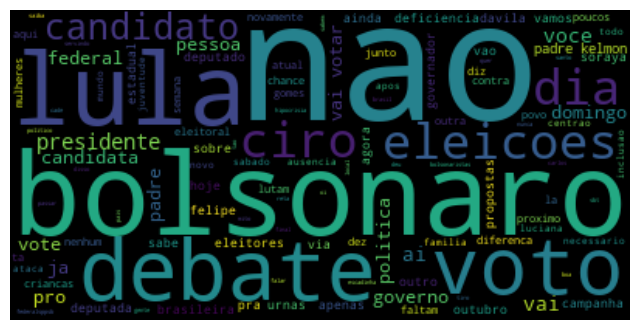

In [15]:
# querying the recent tweets
query = '#eleições2022 #eleicoes2022 #eleições #eleicoes lang:pt -#sosbrasil -is:retweet -is:reply'
dice = client.search_recent_tweets(query = query, max_results = 100)
tweets = dice.data

# initializing tweets lists
tweets_ori = []
tweets_normalized = []

# scrolling through the tweets
for tweet in tweets:
    
    # removing acents
    clean_tweet = unidecode(tweet.text)

    # removing hashtags
    clean_tweet = re.sub(r'#[A-Za-z0-9_]+', '', clean_tweet)

    # removing mentions
    clean_tweet = re.sub(r'@[A-Za-z0-9_]+', '', clean_tweet)

    # normalizing the words
    clean_tweet = clean(clean_tweet, reg=r'https?://\S+|www\.\S+', reg_replace='', stp_lang='portuguese', stopwords=True,
                        stemming=False, extra_spaces=True, lowercase=True, numbers=True, punct=True)
    
    # removing newline character
    clean_tweet = re.sub(r'\n', '', clean_tweet)
    
    # removing emojis
    clean_tweet = emoji.replace_emoji(clean_tweet, replace='')

    # removing rt
    clean_tweet = re.sub(r'rt[\s]+', '', clean_tweet)
    
    # lemmatizing the words
    clean_tweet = lemmatize_text(clean_tweet)

    # removing duplicate words
    clean_tweet = ' '.join(dict.fromkeys(map(str, clean_tweet)))
    
    # storing tweets
    tweets_ori.append(tweet.text)
    tweets_normalized.append(clean_tweet)

# create a dataframe with the tweets
df = pd.DataFrame({
    'tweets': tweets_ori,
    'tweets_normalized': tweets_normalized
})

# creating a column with the words count on 'tweets_normalized' column
df['words_count'] = df['tweets_normalized'].str.split().str.len()

# removing duplicates on 'tweets_normalized' column
dff = df.drop_duplicates(subset=['tweets_normalized'], keep=False)

# viewing the dataframe
# dff

# create and generate a word cloud image
wordcloud = WordCloud().generate(' '.join(dff["tweets_normalized"]))

# display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Histograma das palavras identificadas nos tweets.

<AxesSubplot:ylabel='Frequency'>

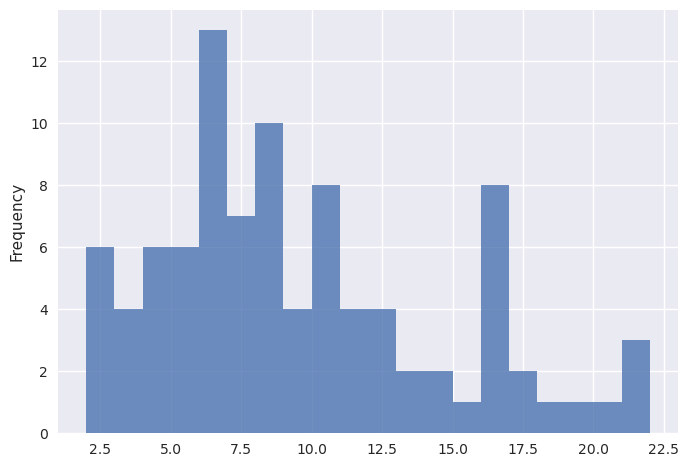

In [16]:
dff['words_count'].plot.hist(bins=20, alpha=0.8)


Visualizando o dataframe de tweets gerado.

In [17]:
display(dff.head())
display(dff.tail())

,tweets,tweets_normalized,words_count
0,Falta 1 Domingo pra acabar com o PT novamente!...,falta domingo pra acabar pt novamente,6
1,Meus votos nas Eleições 2022\n\nTalíria - 5077...,votos eleicoes taliria serafini molon freixo lula,7
2,O que Ciro Gomes vai anunciar amanhã? #enquete...,ciro gomes vai anunciar amanha,5
3,Aí como o povo vai tomar uma cervejinha! Rouba...,ai povo vai tomar cervejinha roubando celular ...,8
5,Agenda da Semana:\n26/09 as 21:30 @fajucast &a...,agenda semana amp esperamos voce la,6


,tweets,tweets_normalized,words_count
95,Amei o que é o que é de Soraya #Eleicoes2022 #...,amei soraya,2
96,Minino Felipe Dávila perdeu uma chance de faze...,minino felipe davila perdeu chance fazer gol s...,8
97,O que é o que é ???? @SorayaThronicke nunca cr...,nunca critiquei hahahaahaha jantou demais agora,6
98,"Ciro não que atacar a honra de ninguém , corta...",ciro nao atacar honra ninguem corta campanha e...,9
99,Um padre que não é padre servindo de escadinha...,padre nao servindo escadinha presidente ironia,6


Montando um dataframe com o saco de palavras ("Bag of Words") dos tweets selecionados, após a normalização.

In [18]:
# creating a bag of words and storing on a dataframe
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dff['tweets_normalized'].to_list())
df_bow_sklearn = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_bow_sklearn


,acabar,aceno,acessibilidade,acima,acimavacinar,acompanhada,acontece,agenda,agora,agua,...,votar,votarem,vote,voto,votos,vou,vox,werner,zap,zona
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Criando um gráfico com as 10 palavras mais utilizadas no saco de palavras ("Bag of Words") dos tweets selecionados, após a normalização. Pelo gráfico abaixo temos uma ideia das palavras em português mais comentadas no Twitter sobre as Eleições 2022, nos últimos 7 dias.

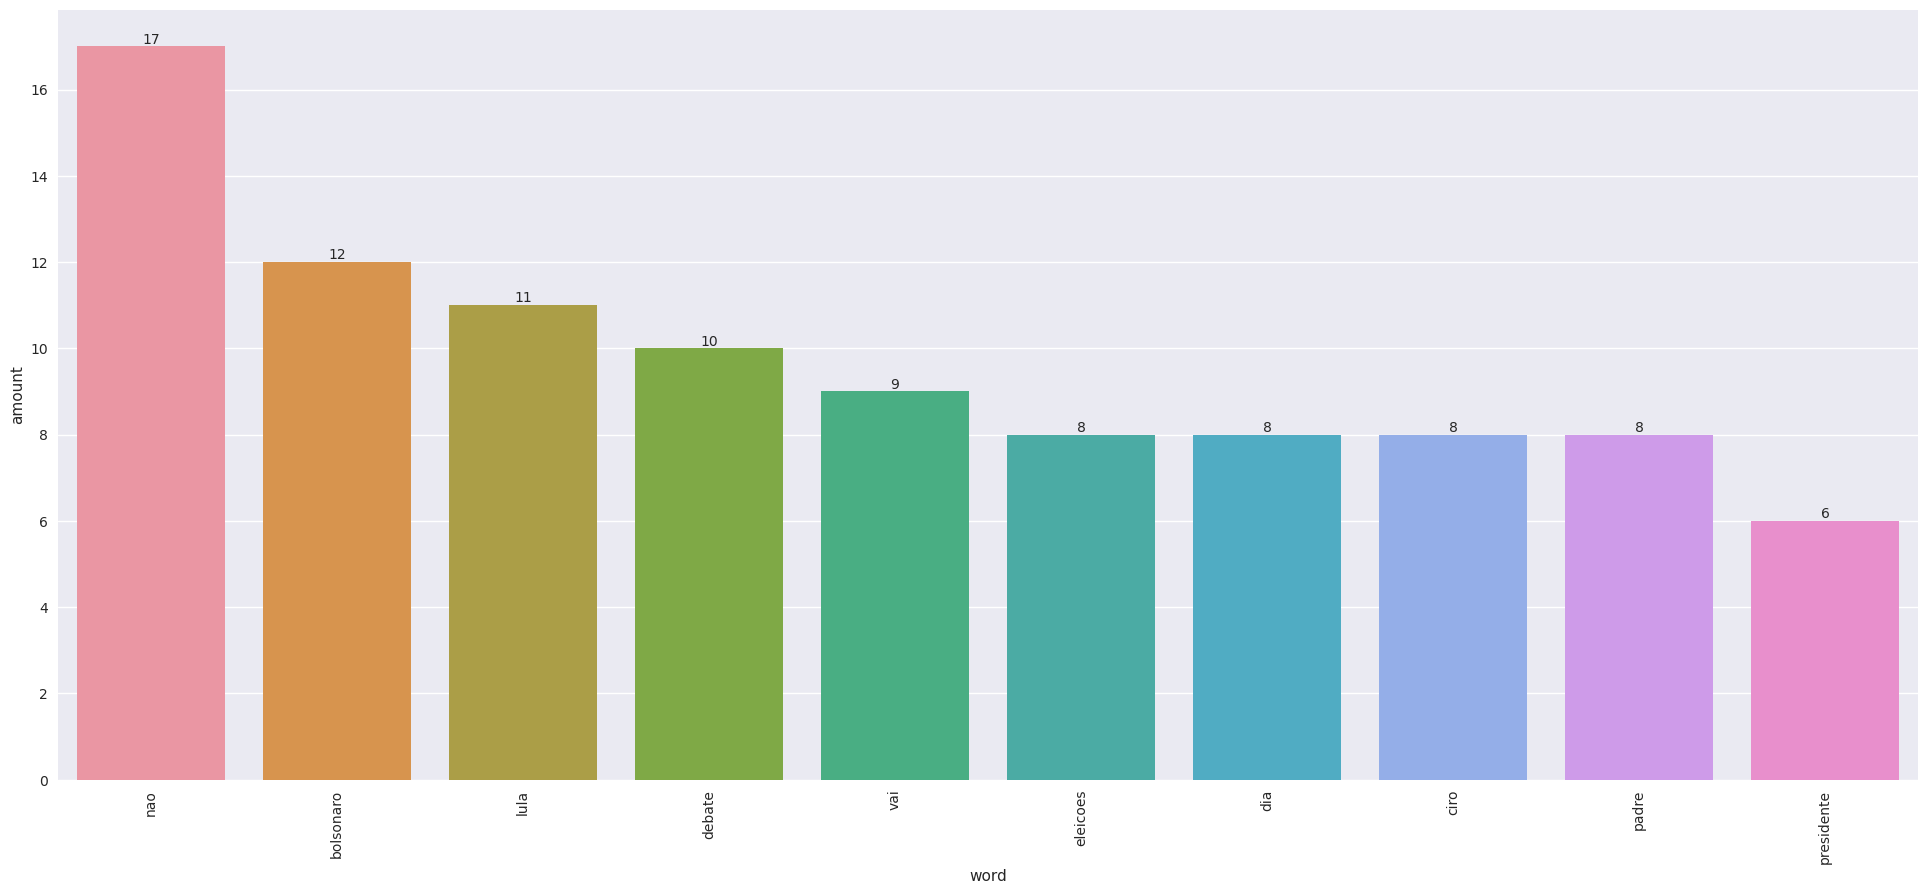

In [19]:
# creating a graph with the top 10 words in the bag of words
data = []
for col in df_bow_sklearn.columns:
    amount = df_bow_sklearn[col].sum()
    data.append([col, amount])
dfr = pd.DataFrame(data, columns=['word', 'amount'])

# configuring the graph
plt.figure(figsize=(24,10))
plt.style.use(["seaborn"])
data = dfr.sort_values('amount', ascending=False).head(10)
ax = sns.barplot(x=data.word, y=data.amount, data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)

# plotting the graph
plt.show()


In [11]:
# TO-DO
# calculating the TF-IDF frequency of words and storing on a dataframe
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_vector = tfidf_vectorizer.fit_transform(dff['tweets_normalized'].to_list())
# tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# tfidf_df
# TO-DO